Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.
Your job is to build a model that will predict the price of a house based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

## Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
import math
import datetime
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

## Loading the database 

In [4]:
data = pd.read_excel('regression_data1.xls')

In [5]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
data.shape

(21597, 21)

In [7]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

## Analysing the independent variables

### Analysing ordinal categoricals 

In [10]:
data['bedrooms'].value_counts()   #Perhaps removing the properties with 33 rooms. Outlier or mistake. 
#Group in less categories? 1 and 2 rooms// five or more.Imbalance in the sample. Our database is concentrated in the 3-4 rooms categories. 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [28]:
data['bathrooms'].value_counts() 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [29]:
data['floors'].value_counts() #We have mostly flats in our database and townhouses, group also here 2 floors and more. 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

We have mostly flats in our database and townhouses, group also here 2 floors and more. 

In [30]:
data['waterfront'].value_counts() 

0    21434
1      163
Name: waterfront, dtype: int64

Imbalance: most of the houses in one category. Visualizing the data with tableau, it seems that waterfront is defined very restrictively.

In [31]:
data['view'].value_counts() 

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

#Most of the houses view category 0 Center of the city? lower floors in apartment buildings?

In [32]:
data['condition'].value_counts() 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [33]:
#Imbalance towards average to good condition.

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


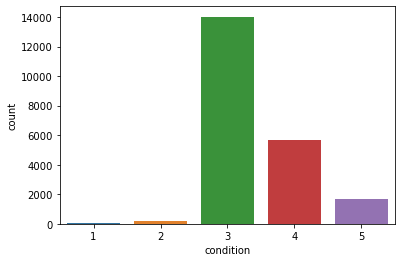

In [38]:
sns.countplot('condition', data=data);
plt.show()


In [34]:
data['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Same results as the previous column. Could be interesting to investigate if the fact of having a rating of the King county increases the price of the house, not possible to check it with this database as all the houses have it.  

Latitute, longitude give the exact location, there is no need for the zip code. We can remove one of the two.Check which one makes more sense. Stock located in Seattle and its environments. Houses above 650k located in the waterfront, the upper part of the city, islands or proximity to water. 


C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


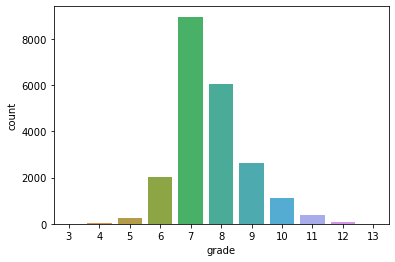

In [39]:
sns.countplot('grade', data=data);
plt.show()

### Analysing date column

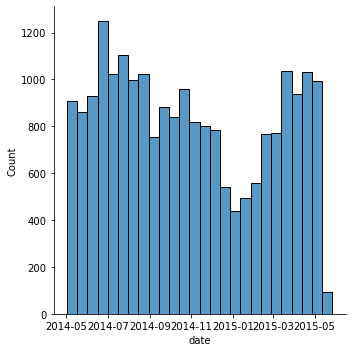

In [35]:
sns.displot(data=data, x="date");


### Analysing continuous variables


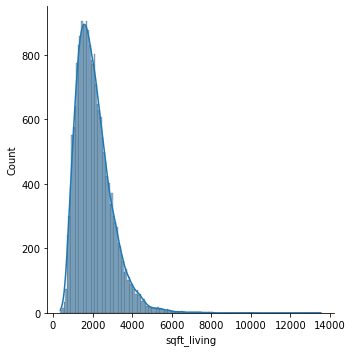

In [41]:
sns.displot(data=data, x="sqft_living", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


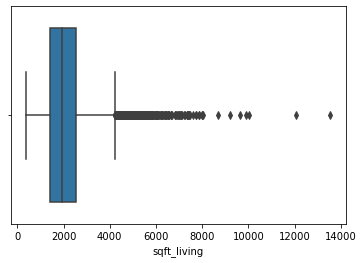

In [47]:
sns.boxplot('sqft_living', data=data);

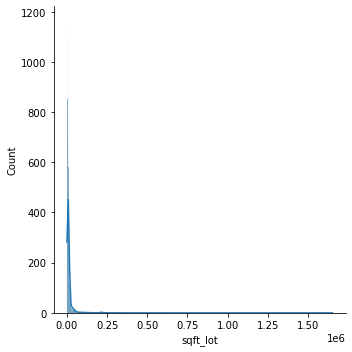

In [42]:
sns.displot(data=data, x="sqft_lot", kde=True); #Is this so because we have many flats? 

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


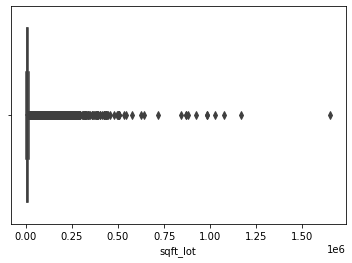

In [48]:
sns.boxplot('sqft_lot', data=data);

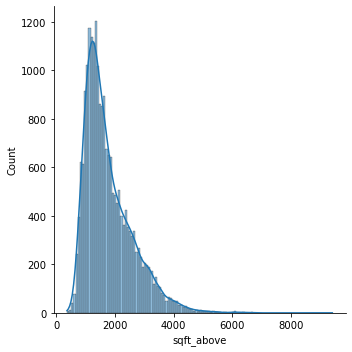

In [43]:
sns.displot(data=data, x="sqft_above", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


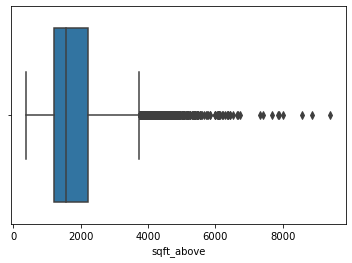

In [49]:
sns.boxplot('sqft_above', data=data);

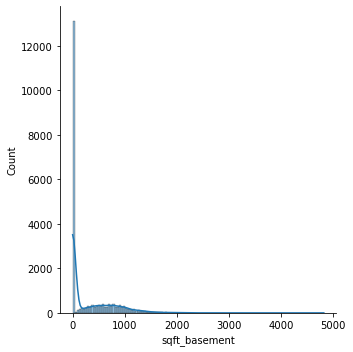

In [44]:
sns.displot(data=data, x="sqft_basement", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


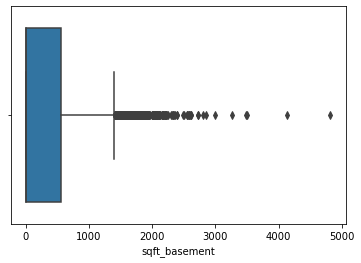

In [50]:
sns.boxplot('sqft_basement', data=data);

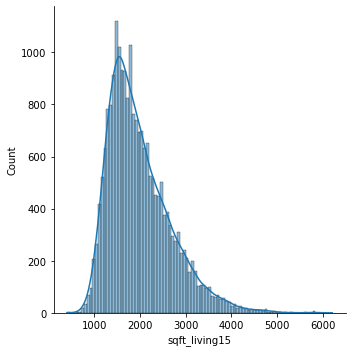

In [45]:
sns.displot(data=data, x="sqft_living15", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


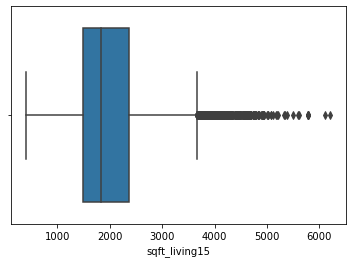

In [51]:
sns.boxplot("sqft_living15", data=data);

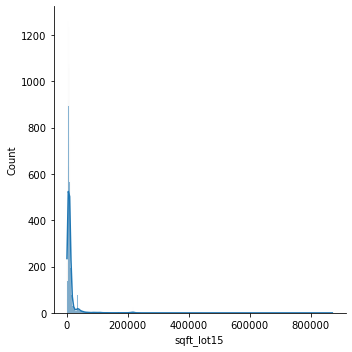

In [46]:
sns.displot(data=data, x="sqft_lot15", kde=True);

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


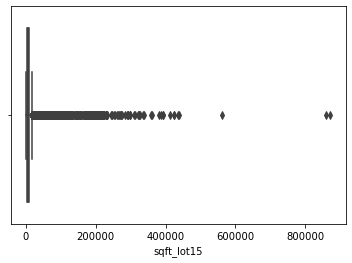

In [52]:
sns.boxplot("sqft_lot15", data=data);

## Analysing the dependent variable

In [ ]:
sns.displot(data=data, x="price")

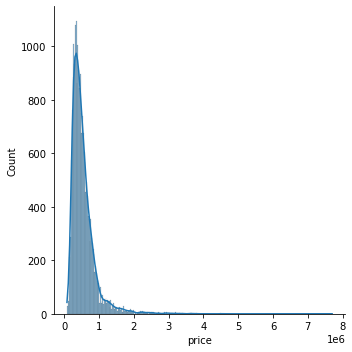

In [40]:
sns.displot(data=data, x="price", kde=True);

Sample collects observations between may 2014 and 2015. It seems more interesting to extract the month as an explicative variable. Seems there are four months during which sales are lower.  

Compare square living and square living 15 to see how many houses have been renovated. See if we can drop any of these columns. Plot the numeric continous variables.  

In [ ]:
sns.displot(data=data, x="price", kind="kde");

C:\Users\31612\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


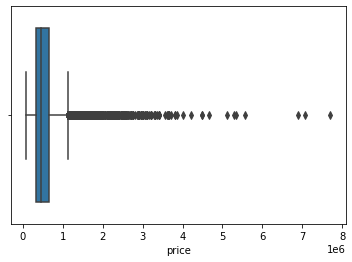

In [14]:
sns.boxplot('price', data=data);

## Preparing the database for modelling

In [11]:
df=data.copy()

#### Extracting month of the year as a new column

In [14]:
df['month'] = df['date'].dt.month 
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2


#### Dropping columns and strange rows

In [15]:
df.drop('date', axis=1, inplace=True)

In [16]:
df.drop('id', axis=1, inplace=True)

In [20]:
data[data['bedrooms']==33]   ##do I need to reset the index???

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [22]:
df.drop([df.index[15856]])

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,yr_built,yr_renovated,month,zipcode,lat,long,price
0,3,1.00,1.0,0,0,3,7,1180,1340,5650,5650,1180,0,1955,0,10,98178,47.5112,-122.257,221900
1,3,2.25,2.0,0,0,3,7,2570,1690,7242,7639,2170,400,1951,1991,12,98125,47.7210,-122.319,538000
2,2,1.00,1.0,0,0,3,6,770,2720,10000,8062,770,0,1933,0,2,98028,47.7379,-122.233,180000
3,4,3.00,1.0,0,0,5,7,1960,1360,5000,5000,1050,910,1965,0,12,98136,47.5208,-122.393,604000
4,3,2.00,1.0,0,0,3,8,1680,1800,8080,7503,1680,0,1987,0,2,98074,47.6168,-122.045,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,1530,1131,1509,1530,0,2009,0,5,98103,47.6993,-122.346,360000
21593,4,2.50,2.0,0,0,3,8,2310,1830,5813,7200,2310,0,2014,0,2,98146,47.5107,-122.362,400000
21594,2,0.75,2.0,0,0,3,7,1020,1020,1350,2007,1020,0,2009,0,6,98144,47.5944,-122.299,402101
21595,3,2.50,2.0,0,0,3,8,1600,1410,2388,1287,1600,0,2004,0,1,98027,47.5345,-122.069,400000


#### Reordering columns

In [18]:
df = df[['bedrooms', 'bathrooms','floors','waterfront', 'view', 'condition', 'grade', 
          'sqft_living', 'sqft_living15', 'sqft_lot','sqft_lot15','sqft_above','sqft_basement',
          'yr_built', 'yr_renovated', 'month', 'zipcode', 'lat', 'long','price']]

In [19]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,yr_built,yr_renovated,month,zipcode,lat,long,price
0,3,1.00,1.0,0,0,3,7,1180,1340,5650,5650,1180,0,1955,0,10,98178,47.5112,-122.257,221900
1,3,2.25,2.0,0,0,3,7,2570,1690,7242,7639,2170,400,1951,1991,12,98125,47.7210,-122.319,538000
2,2,1.00,1.0,0,0,3,6,770,2720,10000,8062,770,0,1933,0,2,98028,47.7379,-122.233,180000
3,4,3.00,1.0,0,0,5,7,1960,1360,5000,5000,1050,910,1965,0,12,98136,47.5208,-122.393,604000
4,3,2.00,1.0,0,0,3,8,1680,1800,8080,7503,1680,0,1987,0,2,98074,47.6168,-122.045,510000


## Correlations


### Correlation matrix and heatmap

In [26]:
correlations_matrix = df.corr()
display(correlations_matrix)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,yr_built,yr_renovated,month,zipcode,lat,long,price
bedrooms,1.000000,0.514508,0.177944,-0.006834,0.080008,0.026496,0.356563,0.578212,0.393406,0.032471,0.030690,0.479386,0.302808,0.155670,0.018389,-0.001046,-0.154092,-0.009951,0.132054,0.308787
bathrooms,0.514508,1.000000,0.502582,0.063744,0.188386,-0.126479,0.665838,0.755758,0.569884,0.088373,0.088303,0.686668,0.283440,0.507173,0.050544,0.007543,-0.204786,0.024280,0.224903,0.525906
floors,0.177944,0.502582,1.000000,0.023755,0.028814,-0.264075,0.458794,0.353953,0.280102,-0.004814,-0.010722,0.523989,-0.245715,0.489193,0.006427,0.014245,-0.059541,0.049239,0.125943,0.256804
waterfront,-0.006834,0.063744,0.023755,1.000000,0.401971,0.016611,0.082888,0.103854,0.086507,0.021632,0.030781,0.072109,0.080559,-0.026153,0.092873,0.008148,0.030272,-0.014306,-0.041904,0.266398
view,0.080008,0.188386,0.028814,0.401971,1.000000,0.045999,0.251728,0.284709,0.280681,0.074900,0.072904,0.167609,0.277078,-0.053636,0.103951,-0.005398,0.084622,0.005871,-0.078107,0.397370
condition,0.026496,-0.126479,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.059445,-0.093072,-0.008830,-0.003126,-0.158904,0.173849,-0.361592,-0.060788,0.022388,0.002888,-0.015102,-0.105877,0.036056
grade,0.356563,0.665838,0.458794,0.082888,0.251728,-0.146896,1.000000,0.762779,0.713867,0.114731,0.120981,0.756073,0.168220,0.447865,0.014261,0.008989,-0.185771,0.113575,0.200341,0.667951
sqft_living,0.578212,0.755758,0.353953,0.103854,0.284709,-0.059445,0.762779,1.000000,0.756402,0.173453,0.184342,0.876448,0.435130,0.318152,0.055308,0.012112,-0.199802,0.052155,0.241214,0.701917
sqft_living15,0.393406,0.569884,0.280102,0.086507,0.280681,-0.093072,0.713867,0.756402,1.000000,0.144763,0.183515,0.731767,0.200443,0.326377,-0.002695,0.002513,-0.279299,0.048679,0.335626,0.585241
sqft_lot,0.032471,0.088373,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.173453,0.144763,1.000000,0.718204,0.184139,0.015418,0.052946,0.007686,-0.002591,-0.129586,-0.085514,0.230227,0.089876


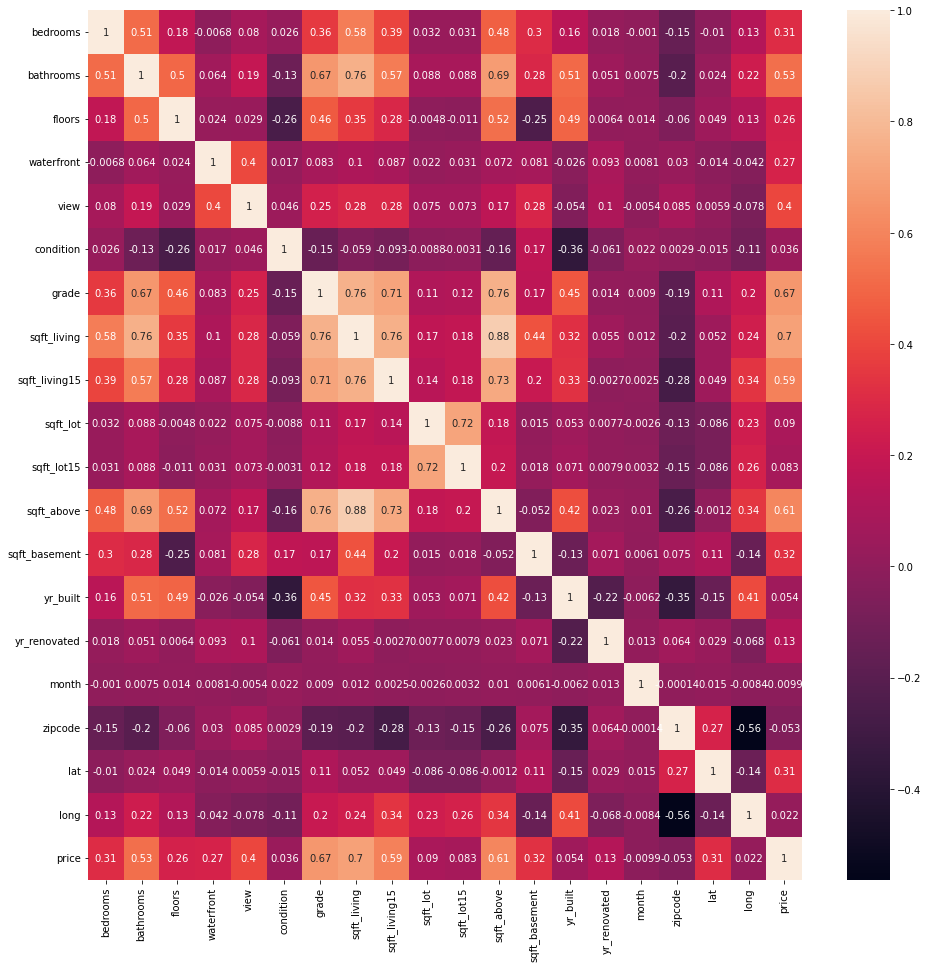

In [32]:
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(correlations_matrix, annot= True)
plt.show()

In [36]:
#sns.pairplot(df)
#pairplotplt.show()

#### Checking for multicollinearity

We drop: 
- condition, sqft_lot, sqft_lot_15, yr_built, month, zipcode and long for its low correlation with the dependent variable. 
We drop: sqft_above because its high correlation with sqft_living can generate multicollinearity in the model. 


In [37]:
df = df.drop('sqft_lot','condition', 'sqft_lot_15', 'yr_built', 'month', 'zipcode', 'long', 'sqft_above' axis=1, inplace=True)

SyntaxError: invalid syntax (Temp/ipykernel_1572/1008383467.py, line 1)

# Splitting and transforming the train and test sets.

In [ ]:
y_log = np.log(df['price'])
X = df.drop(columns = 'price', axis =1)
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [ ]:
powertransformer = PowerTransformer()
powertransformer.fit(X_train)
X_train_trans = powertransformer.transform(X_train)
X_test_trans = powertransformer.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train_trans, columns=X.columns)
X_test_df  = pd.DataFrame(X_test_trans,  columns=X.columns)

# Standarizing????

In [ ]:
transformer = MinMaxScaler()
transformer.fit(X_train1) 
X_train_scaled = transformer.transform(X_train1)
X_test_scaled  = transformer.transform(X_test1)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train1.columns, index=X_train1.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test1.columns, index=X_test1.index)
X_train_scaled.head()

# Modelling

In [ ]:
def my_models(models, Xtrain, Xtest, ytrain, ytest):
    train_scores = []
    test_scores = []
    for model in models:
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_scores.append(r2_score(ytrain, ypred))
        
        ypred_test = model.predict(Xtest)
        test_scores.append(r2_score(ytest, ypred_test))
        
        
    scores = pd.DataFrame([train_scores, test_scores], index=["Train", "Test"], columns=models)
    
    return scores

In [ ]:
models = [KNeighborsRegressor(n_neighbors=3), linear_model.LinearRegression(), MLPRegressor()]

r2scores = my_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
r2scores